# Importing libraries

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import datetime
from datetime import datetime as dt, timedelta

# 1. Cleaning & Processing

I applied a series of steps on the data in order to have better quality data for the next part:

- Step 1: Handling null values in `CustomerId`
- Step 2: Handling duplicates
- Step 3: Handling missing `UnitPrice`
- Step 4: Deleting cancelled orders

In [ ]:
# in order to use read_excel
%pip install openpyxl

# loading dataset
df = pd.read_excel("Data\sales.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNumber  525461 non-null  object        
 1   ProductCode    525461 non-null  object        
 2   ProductName    522533 non-null  object        
 3   Quantity       525461 non-null  int64         
 4   InvoiceDate    525461 non-null  datetime64[ns]
 5   UnitPrice      525461 non-null  float64       
 6   CustomerId     417534 non-null  float64       
 7   Country        525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


### Step 1: Handling null values in `CustomerId`

I dropped the invoices whose customer ID (`CustomerId`) is null (we can see in the df info, there are null in CustomerId). I did this on a copy of df named `df_no_missing_CustomerId`.

In [7]:
df_no_missing_CustomerId = df.copy()
df_no_missing_CustomerId.dropna(subset=['CustomerId'], inplace=True)
df_no_missing_CustomerId.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417534 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNumber  417534 non-null  object        
 1   ProductCode    417534 non-null  object        
 2   ProductName    417534 non-null  object        
 3   Quantity       417534 non-null  int64         
 4   InvoiceDate    417534 non-null  datetime64[ns]
 5   UnitPrice      417534 non-null  float64       
 6   CustomerId     417534 non-null  float64       
 7   Country        417534 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 28.7+ MB


### Step 2: Handling duplicates

I kept only row out of all the duplicated rows. I did this on a copy of the previous dataframe named `df_no_duplicate`.

In [8]:
df_no_duplicate = df_no_missing_CustomerId.copy()
df_no_duplicate = df_no_duplicate.drop_duplicates()
df_no_duplicate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 410763 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNumber  410763 non-null  object        
 1   ProductCode    410763 non-null  object        
 2   ProductName    410763 non-null  object        
 3   Quantity       410763 non-null  int64         
 4   InvoiceDate    410763 non-null  datetime64[ns]
 5   UnitPrice      410763 non-null  float64       
 6   CustomerId     410763 non-null  float64       
 7   Country        410763 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 28.2+ MB


### Step 3: Handling missing `UnitPrice`

I also dropped the rows where `UnitPrice` is zero or a negative number. I did this on a copy of the previous dataframe named `df_no_missing_price`.

In [9]:
df_no_missing_price = df_no_duplicate.copy()
df_no_missing_price = df_no_missing_price[df_no_missing_price['UnitPrice'] > 0]
df_no_missing_price.info()

<class 'pandas.core.frame.DataFrame'>
Index: 410732 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNumber  410732 non-null  object        
 1   ProductCode    410732 non-null  object        
 2   ProductName    410732 non-null  object        
 3   Quantity       410732 non-null  int64         
 4   InvoiceDate    410732 non-null  datetime64[ns]
 5   UnitPrice      410732 non-null  float64       
 6   CustomerId     410732 non-null  float64       
 7   Country        410732 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 28.2+ MB


In [10]:
df_no_missing_price.sample(10)

,InvoiceNumber,ProductCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerId,Country
503403,536408,22371,AIRLINE BAG VINTAGE TOKYO 78,4,2010-12-01 11:41:00,4.25,14307.0,United Kingdom
143150,502968,22457,NATURAL SLATE HEART CHALKBOARD,6,2010-03-29 14:52:00,2.95,16176.0,United Kingdom
325664,521166,22636,CHILDS BREAKFAST SET CIRCUS PARADE,1,2010-09-02 14:52:00,8.50,17238.0,United Kingdom
183108,506794,82587,TEXRIO TOMATOES CANDLE+CUP,12,2010-05-04 12:22:00,1.25,13143.0,United Kingdom
41834,492816,21717,EASTER TIN BUCKET,8,2009-12-20 13:30:00,2.55,12609.0,Germany
329912,521558,21843,RED RETROSPOT CAKE STAND,3,2010-09-07 09:31:00,10.95,16314.0,United Kingdom
478925,534364,22629,SPACEBOY LUNCH BOX,12,2010-11-22 11:58:00,1.95,12681.0,France
28373,491752,20935,ROUND CACTUS CANDLE,24,2009-12-14 12:02:00,1.25,14032.0,United Kingdom
332120,521817,20914,SET/5 RED SPOTTY LID GLASS BOWLS,12,2010-09-08 15:38:00,2.95,16134.0,United Kingdom
340341,522611,90125B,AQUA BERTIE GLASS BEAD BAG CHARM,6,2010-09-15 14:29:00,2.10,12422.0,Switzerland


### Step 4: Deleting cancelled orders

Calculating the percentage of all orders were cancelled and store the rounded number in a variable named `percentage_cancelled_orders`.

In [11]:
df_no_missing_price[df_no_missing_price['InvoiceNumber'].str.startswith('C', na=False)].nunique()
# na=False treats NaN values as False
# nunique() to count the number of unique values 

InvoiceNumber    4372
ProductCode      2080
ProductName      2194
Quantity          157
InvoiceDate      4292
UnitPrice         431
CustomerId       1798
Country            26
dtype: int64

In [12]:
len_unique_all = df_no_missing_price['InvoiceNumber'].nunique()
len_unique_cancelled = df_no_missing_price[df_no_missing_price['InvoiceNumber'].str.startswith('C', na=False)].nunique().iloc[0]
print(len_unique_all, len_unique_cancelled)

23585 4372


In [13]:
percentage_cancelled_orders = round(len_unique_cancelled*100 / len_unique_all)
print('percentage_cancelled_orders = ', percentage_cancelled_orders)

percentage_cancelled_orders =  19


I wanted to find out the five customers with the highest number of order cancellations and then stored their Ids in `top_cancelling_customers` list (in descending order).

In [14]:
f_list = df_no_missing_price[df_no_missing_price['InvoiceNumber'].str.startswith('C', na=False)].drop_duplicates(subset=['InvoiceNumber', 'CustomerId'])['CustomerId'].value_counts().index[:5].to_list()
f_list

[14911.0, 14527.0, 15311.0, 14156.0, 17841.0]

In [15]:
top_cancelling_customers = [str(element) for element in f_list]
top_cancelling_customers

['14911.0', '14527.0', '15311.0', '14156.0', '17841.0']

I deleted the rows related to cancelled orders from the dataframe using a copy of `df_no_missing price` called `df_no_cancelled_invoice`.

In [16]:
df_no_cancelled_invoice = df_no_missing_price.copy()
index_del = df_no_cancelled_invoice[df_no_cancelled_invoice['InvoiceNumber'].str.startswith('C', na = False)].index
df_no_cancelled_invoice = df_no_cancelled_invoice.drop(index_del)
df_no_cancelled_invoice.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400916 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNumber  400916 non-null  object        
 1   ProductCode    400916 non-null  object        
 2   ProductName    400916 non-null  object        
 3   Quantity       400916 non-null  int64         
 4   InvoiceDate    400916 non-null  datetime64[ns]
 5   UnitPrice      400916 non-null  float64       
 6   CustomerId     400916 non-null  float64       
 7   Country        400916 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.5+ MB


# 2. Exploration

By answering some questions and drawing some graphs, I got a better view of the company's financial information.

- Question 1: How many remaining unique invoices are there?
- Question 2: Over what period of time was this data collected?
- Question 3: Using a bar chart to show how many unique invoices have been issued on each day of the week.
- Question 4: Drawing a bar graph of revenue over months of each year.

At the end of this step, I saved the processed data into a csv file for later analysis.

In [36]:
df2 = df_no_cancelled_invoice.copy()
df2.sample(10)

,InvoiceNumber,ProductCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerId,Country
161920,504871,21933,PINK VINTAGE PAISLEY PICNIC BAG,25,2010-04-18 12:33:00,2.55,12482.0,Sweden
10978,490289,71459,HANGING JAM JAR T-LIGHT HOLDER,12,2009-12-04 13:01:00,0.85,15309.0,United Kingdom
520298,537754,22305,COFFEE MUG PINK PAISLEY DESIGN,6,2010-12-08 11:16:00,2.55,16081.0,United Kingdom
257886,514313,21754,HOME BUILDING BLOCK WORD,3,2010-07-01 13:30:00,5.95,14709.0,United Kingdom
359967,524284,21232,STRAWBERRY CERAMIC TRINKET BOX,12,2010-09-28 12:26:00,1.25,16779.0,United Kingdom
320027,520570,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2,2010-08-26 20:07:00,2.95,16549.0,United Kingdom
77002,496373,22326,ROUND SNACK BOXES SET OF4 WOODLAND,6,2010-02-01 11:30:00,2.95,12711.0,Germany
178148,506276,21218,RED SPOTTY BISCUIT TIN,6,2010-04-28 15:39:00,3.75,17581.0,United Kingdom
157166,504386,22332,SKULLS PARTY BAG + STICKER SET,6,2010-04-13 11:38:00,1.65,14057.0,United Kingdom
270150,515541,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2,2010-07-13 12:12:00,2.95,14069.0,United Kingdom


### Question 1: How many remaining unique invoices are there?

In [37]:
number_of_orders = len(df2['InvoiceNumber'].unique())
number_of_orders

19213

### Question 2: Over what period of time was this data collected?

I stored the answer as a tuple, in `window_period` variable, which contains the first time and the last time, respectively.

In [38]:
window_period = (min(df2.InvoiceDate), max(df2.InvoiceDate))
window_period

(Timestamp('2009-12-01 07:45:00'), Timestamp('2010-12-09 20:01:00'))

### Question 3: Using a bar chart to show how many unique invoices have been issued on each day of the week.

In [39]:
# extract the day of the week from the InvoiceDate column
df2['day_of_week'] = pd.to_datetime(df2['InvoiceDate']).dt.day_of_week

In [40]:
df2['day_of_week'].unique()

array([1, 2, 3, 4, 5, 6, 0])

In [41]:
df2.groupby('day_of_week')['InvoiceNumber'].nunique().sort_index()

day_of_week
0    2986
1    3514
2    3426
3    3976
4    2615
5      30
6    2666
Name: InvoiceNumber, dtype: int64

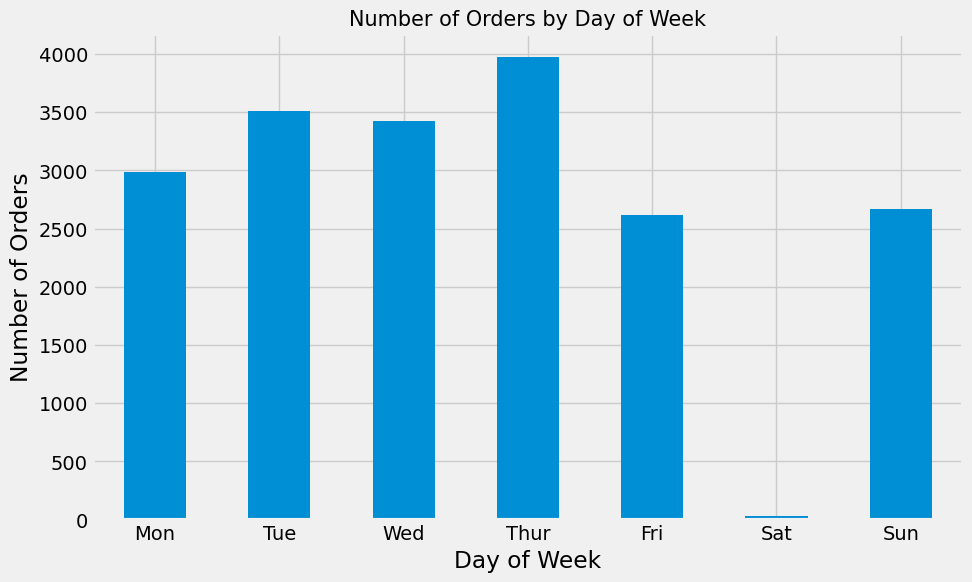

In [42]:
fig1, ax1 = plt.subplots(figsize=(10,6))

# group by day of the week and count the number of unique orders
df2.groupby('day_of_week')['InvoiceNumber'].nunique().sort_index().plot(ax=ax1, kind='bar')

# set the xticklabels to the names of they days
days = ('Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun')
ax1.set_xticklabels(days, rotation=0)

# set the labels and title
ax1.set_title('Number of Orders by Day of Week', size=15)
ax1.set_xlabel('Day of Week')
ax1.set_ylabel('Number of Orders')
plt.show()

### Question 4: Drawing a bar graph of revenue over months of each year. 

In [43]:
# create a new column for sales of each row (order line)
df2['Sales'] = df2['Quantity'] * df2['UnitPrice']

# extract the month and year from the InvoiceDate
df2['Month_Year'] = pd.to_datetime(df2['InvoiceDate']).dt.strftime('%b_%Y')

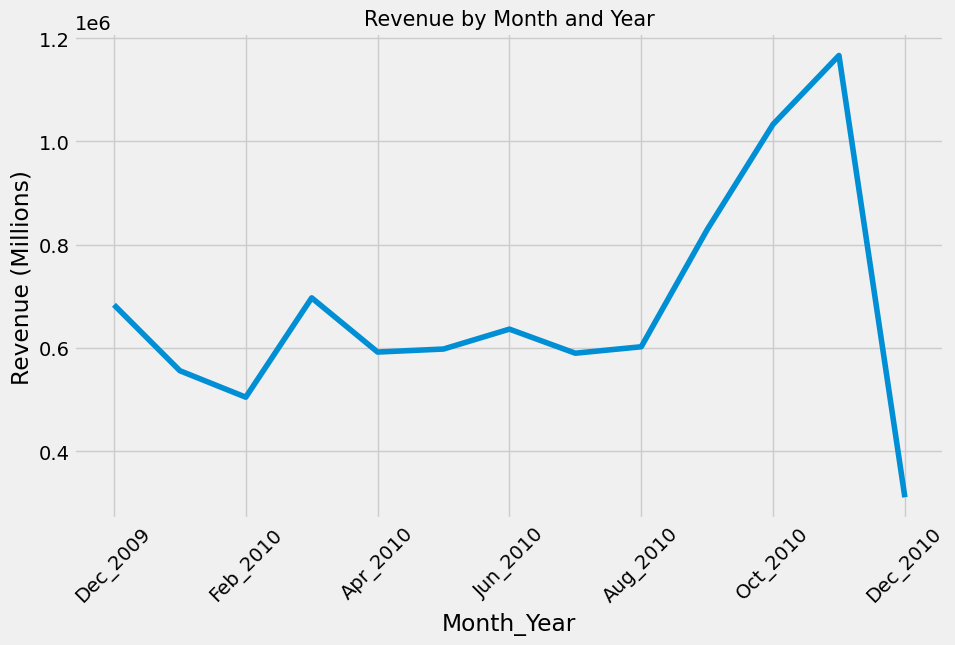

In [44]:
fig2, ax2 = plt.subplots(figsize=(10,6))

# revenue group by month and year
df2.groupby('Month_Year', sort=False)['Sales'].sum().plot(ax=ax2, kind='line')

# set the labels and title
ax2.set_xlabel('Month_Year')
ax2.set_ylabel('Revenue (Millions)')
ax2.set_title('Revenue by Month and Year', size=15)
plt.xticks(rotation=45)
plt.show()

### Storing processed data

I saved the processed data into a csv file for later analysis.

In [45]:
# df2.head()

In [46]:
# df2.to_csv('processed_data.csv')

# 3. Market Research

## Scatter Plot of Revenue and Number of Customers by Country

This chart shows different countries based on their revenue and number of customer, and divides them into 4 groups.

Rev, qRev stand for 'Revenue' and its third quartile.

NC, qNC stand for 'Number of Customers' and its third quartile.

|Group|Description|Conditions|Color|
|---|---|---|---|
|1|High NC and high Rev|`NC >= qNC`, `Rev >= qRev`|Red|
|2|High NC and low Rev|`NC >= qNC`, `Rev < qRev`|Blue|
|3|Low NC and high Rev|`NC < qNC`, `Rev >= qRev`|Green|
|4|Low NC and low Rev|`NC < qNC`, `Rev < qRev`|Cyan|


In [18]:
# prepare dataframe
df3 = pd.read_csv('Data\processed_data.csv', parse_dates=['InvoiceDate'])
df3.drop(columns='Unnamed: 0', inplace=True)

df3_grouped = df3.groupby('Country')[['CustomerId', 'Sales']].agg({'CustomerId': 'nunique', 'Sales': 'sum'})

quar_3 = df3_grouped.quantile(.75)
qNC = quar_3.iloc[0]
qRev = quar_3.iloc[1]

g1 = df3_grouped[(df3_grouped['CustomerId'] >= qNC) & (df3_grouped['Sales'] >= qRev)]
g2 = df3_grouped[(df3_grouped['CustomerId'] >= qNC) & (df3_grouped['Sales'] < qRev)]
g3 = df3_grouped[(df3_grouped['CustomerId'] < qNC) & (df3_grouped['Sales'] >= qRev)]
g4 = df3_grouped[(df3_grouped['CustomerId'] < qNC) & (df3_grouped['Sales'] < qRev)]

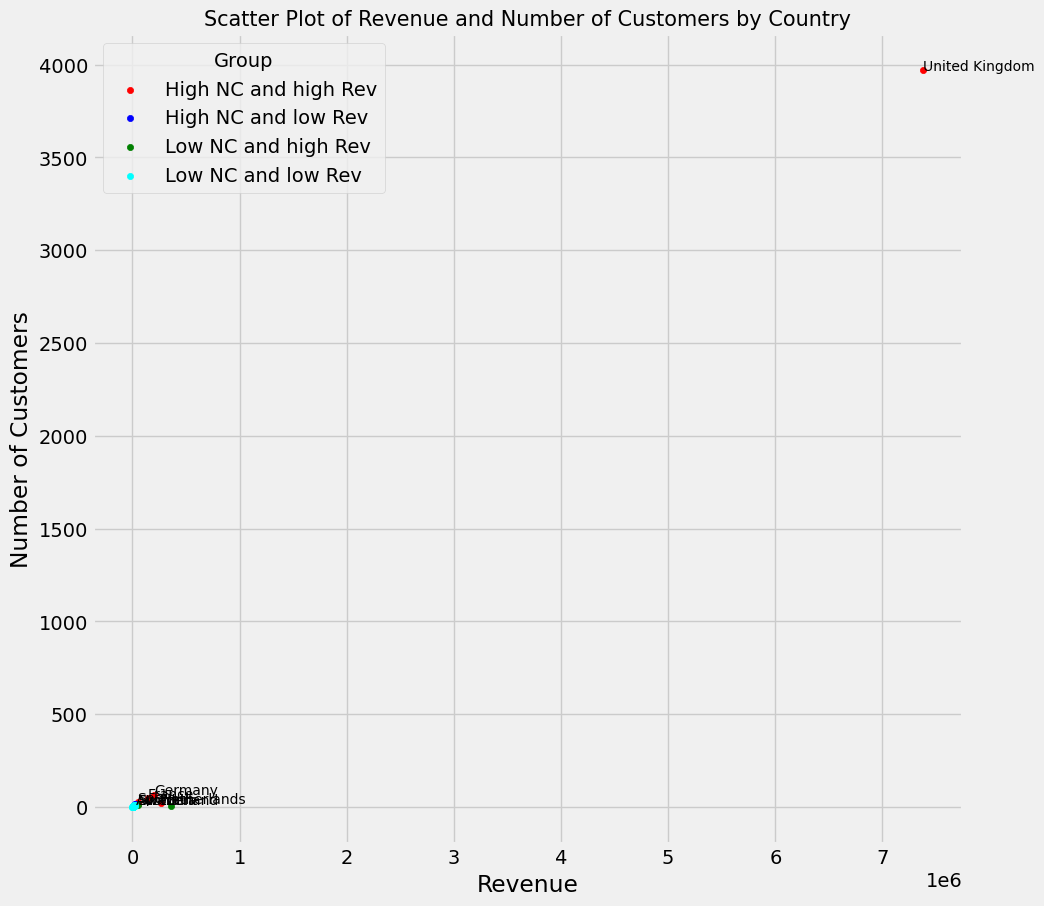

In [19]:
fig, ax = plt.subplots(figsize=(10,10))

# coloring groups
ax.scatter(x = g1['Sales'], y = g1['CustomerId'], s=20, c='red', label='High NC and high Rev')
ax.scatter(x = g2['Sales'], y = g2['CustomerId'], s=20, c='blue', label='High NC and low Rev')
ax.scatter(x = g3['Sales'], y = g3['CustomerId'], s=20, c='green', label='Low NC and high Rev')
ax.scatter(x = g4['Sales'], y = g4['CustomerId'], s=20, c='cyan', label='Low NC and low Rev')

# labeling for group 1
for i in range(0, len(g1)):
    # ax.text(g1.Sales[i], g1.CustomerId[i] + 0.5, g1.index[i], fontsize=10)
    ax.text(g1.iloc[i,1], g1.iloc[i,0] + 0.5, g1.index[i], fontsize=10)

ax.set_title('Scatter Plot of Revenue and Number of Customers by Country', size=15)
ax.set_xlabel('Revenue')
ax.set_ylabel('Number of Customers')
ax.legend(title='Group')
plt.show()

In [20]:
# looking at the table to find out which country are outliers
df3_grouped.sort_values(by='Sales', ascending=False).head(10)

,CustomerId,Sales
Country,,
United Kingdom,3969,7381644.433
EIRE,5,356041.860
Netherlands,22,268784.350
Germany,67,202025.391
France,47,146107.070
Sweden,16,53147.990
Denmark,9,50906.850
Spain,25,47568.650
Switzerland,14,43921.390


I decided to remove `United Kingdom` which is an outlier.

In [21]:
df3_grouped = df3_grouped.drop('United Kingdom')
df3_grouped.sort_values(by='Sales', ascending=False).head(10)

,CustomerId,Sales
Country,,
EIRE,5,356041.860
Netherlands,22,268784.350
Germany,67,202025.391
France,47,146107.070
Sweden,16,53147.990
Denmark,9,50906.850
Spain,25,47568.650
Switzerland,14,43921.390
Australia,15,31446.800


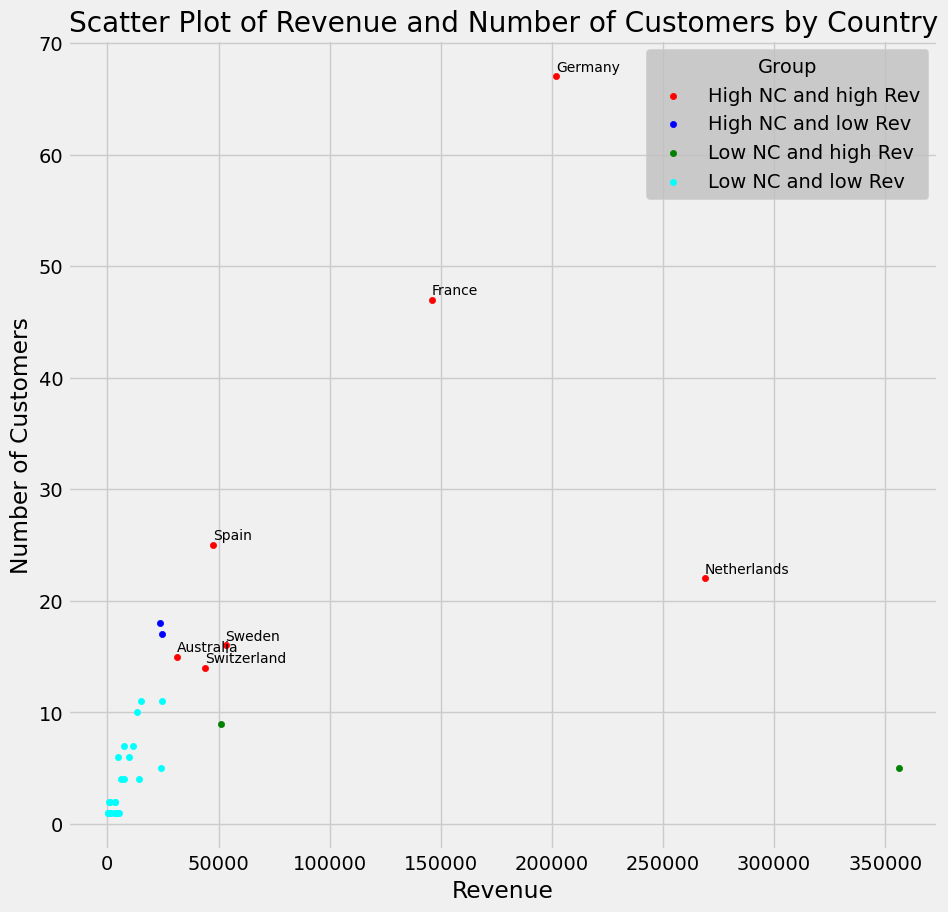

In [22]:
quar_3 = df3_grouped.quantile(.75)
qNC = quar_3.iloc[0]
qRev = quar_3.iloc[1]

g1 = df3_grouped[(df3_grouped['CustomerId'] >= qNC) & (df3_grouped['Sales'] >= qRev)]
g2 = df3_grouped[(df3_grouped['CustomerId'] >= qNC) & (df3_grouped['Sales'] < qRev)]
g3 = df3_grouped[(df3_grouped['CustomerId'] < qNC) & (df3_grouped['Sales'] >= qRev)]
g4 = df3_grouped[(df3_grouped['CustomerId'] < qNC) & (df3_grouped['Sales'] < qRev)]

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(10,10))

# coloring groups
ax.scatter(x = g1['Sales'], y = g1['CustomerId'], s=20, c='red', label='High NC and high Rev')
ax.scatter(x = g2['Sales'], y = g2['CustomerId'], s=20, c='blue', label='High NC and low Rev')
ax.scatter(x = g3['Sales'], y = g3['CustomerId'], s=20, c='green', label='Low NC and high Rev')
ax.scatter(x = g4['Sales'], y = g4['CustomerId'], s=20, c='cyan', label='Low NC and low Rev')

# labeling for group 1
for i in range(0, len(g1)):
    # ax.text(g1.Sales[i], g1.CustomerId[i] + 0.5, g1.index[i], fontsize=10)
    ax.text(g1.iloc[i,1], g1.iloc[i,0] + 0.5, g1.index[i], fontsize=10)

ax.set_title('Scatter Plot of Revenue and Number of Customers by Country')
ax.set_xlabel('Revenue')
ax.set_ylabel('Number of Customers')
ax.legend(title='Group', frameon=True, facecolor='silver')
plt.show()

# 4. Customer Segmentation

**RFM method:**

1. Recency: The number of days since the customer's last purchase
2. Frequency: The number of times the customer has made a purchase
3. Monetary value: Total sales that the company has received from a customer

## 4.1 Calculating criterias

Calculating Recency for each `CustomerId`: I calculated the number of days since the customer's last purchase compared to one day after the last date in the dataset.

In [11]:
df4 = pd.read_csv('Data\processed_data.csv', parse_dates=['InvoiceDate'])
df4.drop(columns='Unnamed: 0', inplace=True)

last_day = max(df4.InvoiceDate) + timedelta(days=1)
last_day

Timestamp('2010-12-10 20:01:00')

In [12]:
df_customer_segments = pd.DataFrame({'Recency': 
                                    (last_day 
                                      - df4.groupby('CustomerId')['InvoiceDate'].agg('max')
                                    ).dt.days}).reset_index()
df_customer_segments

,CustomerId,Recency
0,12346.0,165
1,12347.0,3
2,12348.0,74
3,12349.0,43
4,12351.0,11
...,...,...
4307,18283.0,18
4308,18284.0,67
4309,18285.0,296
4310,18286.0,112


Calculating how many unique purchases each customer has made.

In [13]:
df_customer_segments['Frequency'] = df4.groupby('CustomerId').InvoiceNumber.nunique().values
df_customer_segments.head()

,CustomerId,Recency,Frequency
0,12346.0,165,11
1,12347.0,3,2
2,12348.0,74,1
3,12349.0,43,3
4,12351.0,11,1


Calculating total sales from each customer.

In [14]:
df_customer_segments['MonetaryValue'] = df4.groupby('CustomerId').Sales.agg('sum').values
df_customer_segments.head()

,CustomerId,Recency,Frequency,MonetaryValue
0,12346.0,165,11,372.86
1,12347.0,3,2,1323.32
2,12348.0,74,1,222.16
3,12349.0,43,3,2671.14
4,12351.0,11,1,300.93


## 4.2. Grouping each critera

I divided each criteria into their quartiles.

In [15]:
def get_quartile(ar):
    qu = np.quantile(ar, [0.25, 0.5, 0.75])
    output = []
    for x in ar:
        if x <= qu[0]:
            output.append('1')
        elif x > qu[0] and x <= qu[1]:
            output.append('2')
        elif x > qu[1] and x <= qu[2]:
            output.append('3')
        elif x > qu[2]:
            output.append('4')
    return output

In [16]:
df_customer_segments['R_quartile'] = get_quartile(df_customer_segments['Recency'])
df_customer_segments['F_quartile'] = get_quartile(df_customer_segments['Frequency'])
df_customer_segments['M_quartile'] = get_quartile(df_customer_segments['MonetaryValue'])
df_customer_segments.head()

,CustomerId,Recency,Frequency,MonetaryValue,R_quartile,F_quartile,M_quartile
0,12346.0,165,11,372.86,4,4,2
1,12347.0,3,2,1323.32,1,2,3
2,12348.0,74,1,222.16,3,1,1
3,12349.0,43,3,2671.14,2,3,4
4,12351.0,11,1,300.93,1,1,1


## 4.3. R + F + M

Concatenating `R_quartile`, `F_quartile`, `M_quartile`.

In [17]:
df_customer_segments['RFM'] = df_customer_segments.R_quartile + df_customer_segments.F_quartile + df_customer_segments.M_quartile
df_customer_segments.head()

,CustomerId,Recency,Frequency,MonetaryValue,R_quartile,F_quartile,M_quartile,RFM
0,12346.0,165,11,372.86,4,4,2,442
1,12347.0,3,2,1323.32,1,2,3,123
2,12348.0,74,1,222.16,3,1,1,311
3,12349.0,43,3,2671.14,2,3,4,234
4,12351.0,11,1,300.93,1,1,1,111


## 4.4. Segmenting

Segmenting based on the table below:

|*Segment*|*RFM*|
|--|--|
|Best|144|
|AlmostLost|344|
|LostBigSpenders|444|
|LostCheap|441|
|Loyal|X4X|
|BigSpenders|XX4|

- If a customer was not included in any segment above, he is considered to be normal.
- Also, if an RFM can be placed in two groups, priority is given to the group that is higher in the table.

In [18]:
def rfm_segment(input):
    output = []
    for i in input:
        if i == '144':
            output.append('Best')
        elif i == '344': 
            output.append('AlmostLost')
        elif i == '444': 
            output.append('LostBigSpenders')
        elif i == '441': 
            output.append('LostCheap')
        elif str(i)[1] == '4': 
            output.append('Loyal')
        elif str(i)[2] == '4': 
            output.append('BigSpenders')
        else:
            output.append('Normal')
    return output

In [19]:
df_customer_segments['Segment'] = rfm_segment(df_customer_segments['RFM'])
df_customer_segments

,CustomerId,Recency,Frequency,MonetaryValue,R_quartile,F_quartile,M_quartile,RFM,Segment
0,12346.0,165,11,372.86,4,4,2,442,Loyal
1,12347.0,3,2,1323.32,1,2,3,123,Normal
2,12348.0,74,1,222.16,3,1,1,311,Normal
3,12349.0,43,3,2671.14,2,3,4,234,BigSpenders
4,12351.0,11,1,300.93,1,1,1,111,Normal
...,...,...,...,...,...,...,...,...,...
4307,18283.0,18,6,619.37,1,4,2,142,Loyal
4308,18284.0,67,1,461.68,3,1,2,312,Normal
4309,18285.0,296,1,427.00,4,1,2,412,Normal
4310,18286.0,112,2,1296.43,3,2,3,323,Normal


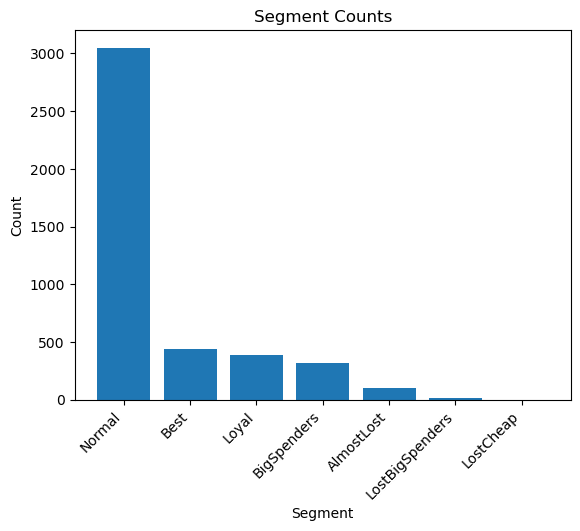

In [24]:
segment_count = df_customer_segments['Segment'].value_counts()
plt.bar(segment_count.index, segment_count.values)

plt.title('Segment Counts')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.show()

In [67]:
# create a series of segment percentages
seg_pct = segment_count*100/segment_count.values.sum()
seg_pct

Segment
Normal             70.709647
Best               10.204082
Loyal               8.974954
BigSpenders         7.444341
AlmostLost          2.272727
LostBigSpenders     0.371058
LostCheap           0.023191
Name: count, dtype: float64

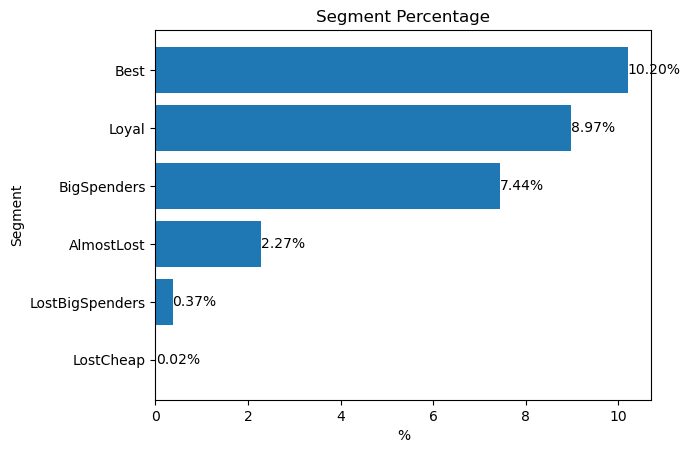

In [69]:
# segment percentages without 'Normal' 
seg_pct_no_normal = seg_pct[seg_pct.index != 'Normal']

fig, ax = plt.subplots()

# create the horizontal bar chart and add value labels to each bar
bars = plt.barh(seg_pct_no_normal.index, seg_pct_no_normal.values)
for bar in bars:
    # get the width of each bar
    width = bar.get_width()
    # place the label at the end of the bar
    ax.text(width, bar.get_y() + bar.get_height()/2,
            f'{width:.2f}%',  # format the label as a percentage with 2 decimal places
            va='center',      # vertical alignment
            ha='left')        # horizontal alignment

# format
ax.invert_yaxis() # invert the y-axis to display the highest values at the top
plt.title('Segment Percentage')
plt.ylabel('Segment')
plt.xlabel('%')
plt.show()

# 5. Retention Analysis

In [3]:
df5 = pd.read_csv('Data\processed_data.csv', parse_dates=['InvoiceDate'])
df5.drop(columns='Unnamed: 0', inplace=True)
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400916 entries, 0 to 400915
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNumber  400916 non-null  int64         
 1   ProductCode    400916 non-null  object        
 2   ProductName    400916 non-null  object        
 3   Quantity       400916 non-null  int64         
 4   InvoiceDate    400916 non-null  datetime64[ns]
 5   UnitPrice      400916 non-null  float64       
 6   CustomerId     400916 non-null  float64       
 7   Country        400916 non-null  object        
 8   day_of_week    400916 non-null  int64         
 9   Sales          400916 non-null  float64       
 10  Month_Year     400916 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 33.6+ MB


## Retention Chart

The vertical axis shows the month when customers had their first purchase, the horizontal axis shows how many percent of new customers are remained in the months after the first transaction (having at least one invoice per month).

In [4]:
# extract InvoiceMonth and InvoiceYear from InvoiceDate
df5['InvoiceMonth'] = df5['InvoiceDate'].dt.month
df5['InvoiceYear'] = df5['InvoiceDate'].dt.year

# create CohortDate column, the date customers purchase for the first time,
# from which I extract CohortMonth and CohortYear
df5['CohortDate'] = df5.groupby('CustomerId')['InvoiceDate'].transform('min') # first purchase date
df5['Cohort'] = df5['CohortDate'].apply(lambda x: dt(x.year, x.month, 1)) # first day of the month
df5['CohortMonth'] = df5['CohortDate'].dt.month
df5['CohortYear'] = df5['CohortDate'].dt.year
df5

,InvoiceNumber,ProductCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerId,Country,day_of_week,Sales,Month_Year,InvoiceMonth,InvoiceYear,CohortDate,Cohort,CohortMonth,CohortYear
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,1,83.40,Dec_2009,12,2009,2009-12-01 07:45:00,2009-12-01,12,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,1,81.00,Dec_2009,12,2009,2009-12-01 07:45:00,2009-12-01,12,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,1,81.00,Dec_2009,12,2009,2009-12-01 07:45:00,2009-12-01,12,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,1,100.80,Dec_2009,12,2009,2009-12-01 07:45:00,2009-12-01,12,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,1,30.00,Dec_2009,12,2009,2009-12-01 07:45:00,2009-12-01,12,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400911,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,3,5.90,Dec_2010,12,2010,2009-12-06 16:17:00,2009-12-01,12,2009
400912,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3,3.75,Dec_2010,12,2010,2009-12-06 16:17:00,2009-12-01,12,2009
400913,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3,3.75,Dec_2010,12,2010,2009-12-06 16:17:00,2009-12-01,12,2009
400914,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3,7.50,Dec_2010,12,2010,2009-12-06 16:17:00,2009-12-01,12,2009


In [5]:
# calculate CohortIndex by converting the difference in years and months between 
# CohortMonth and InvoiceMonth to months, and adding 1
df5['CohortPeriod'] = (df5['InvoiceYear'] - df5['CohortYear'])*12 + (df5['InvoiceMonth'] - df5['CohortMonth']) + 1
df5

,InvoiceNumber,ProductCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerId,Country,day_of_week,Sales,Month_Year,InvoiceMonth,InvoiceYear,CohortDate,Cohort,CohortMonth,CohortYear,CohortPeriod
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,1,83.40,Dec_2009,12,2009,2009-12-01 07:45:00,2009-12-01,12,2009,1
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,1,81.00,Dec_2009,12,2009,2009-12-01 07:45:00,2009-12-01,12,2009,1
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,1,81.00,Dec_2009,12,2009,2009-12-01 07:45:00,2009-12-01,12,2009,1
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,1,100.80,Dec_2009,12,2009,2009-12-01 07:45:00,2009-12-01,12,2009,1
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,1,30.00,Dec_2009,12,2009,2009-12-01 07:45:00,2009-12-01,12,2009,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400911,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,3,5.90,Dec_2010,12,2010,2009-12-06 16:17:00,2009-12-01,12,2009,13
400912,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3,3.75,Dec_2010,12,2010,2009-12-06 16:17:00,2009-12-01,12,2009,13
400913,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3,3.75,Dec_2010,12,2010,2009-12-06 16:17:00,2009-12-01,12,2009,13
400914,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3,7.50,Dec_2010,12,2010,2009-12-06 16:17:00,2009-12-01,12,2009,13


In [6]:
# group the dataframe by CohortMonth and CohortIndex
grouping = df5.groupby(['Cohort', 'CohortPeriod'])

# count unique CustomerId in each (CohortMonth, CohortIndex) group
# cohort_data = grouping['CustomerId'].apply(pd.Series.nunique)
cohort_data = grouping['CustomerId'].nunique()

# reset the index to create a flat table with columns 
cohort_data = cohort_data.reset_index()

# reshape the df by pivoting so that the columns represents the CohortIndex values,
# and the rows represents the CohortMonth values, and cells shows the unique count of CustomerId
cohort_pivot = cohort_data.pivot(index='Cohort', columns='CohortPeriod', values='CustomerId')

cohort_pivot

CohortPeriod,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohort,,,,,,,,,,,,,
2009-12-01,955.0,337.0,319.0,406.0,363.0,343.0,360.0,327.0,321.0,346.0,403.0,473.0,237.0
2010-01-01,383.0,79.0,119.0,117.0,101.0,115.0,99.0,88.0,107.0,122.0,116.0,38.0,NaN
2010-02-01,374.0,89.0,84.0,109.0,92.0,75.0,72.0,107.0,95.0,103.0,27.0,NaN,NaN
2010-03-01,443.0,84.0,102.0,107.0,103.0,90.0,109.0,134.0,122.0,35.0,NaN,NaN,NaN
2010-04-01,294.0,57.0,57.0,48.0,54.0,66.0,81.0,77.0,20.0,NaN,NaN,NaN,NaN
2010-05-01,254.0,40.0,43.0,44.0,45.0,65.0,54.0,20.0,NaN,NaN,NaN,NaN,NaN
2010-06-01,270.0,47.0,51.0,55.0,62.0,77.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-01,186.0,29.0,34.0,55.0,54.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-01,162.0,33.0,48.0,52.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# select the first columns of the pivot table which are the initial numbers of customer of each cohort
cohort_sizes = cohort_pivot.iloc[:,0]

# divide the entire cohort_pivot dataframe by the cohort_sizes series, row-wise, to create a maxtrix 
# of customer retention rates
retention = cohort_pivot.divide(cohort_sizes,axis=0)
retention = retention.round(3)*100

retention

CohortPeriod,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohort,,,,,,,,,,,,,
2009-12-01,100.0,35.3,33.4,42.5,38.0,35.9,37.7,34.2,33.6,36.2,42.2,49.5,24.8
2010-01-01,100.0,20.6,31.1,30.5,26.4,30.0,25.8,23.0,27.9,31.9,30.3,9.9,NaN
2010-02-01,100.0,23.8,22.5,29.1,24.6,20.1,19.3,28.6,25.4,27.5,7.2,NaN,NaN
2010-03-01,100.0,19.0,23.0,24.2,23.3,20.3,24.6,30.2,27.5,7.9,NaN,NaN,NaN
2010-04-01,100.0,19.4,19.4,16.3,18.4,22.4,27.6,26.2,6.8,NaN,NaN,NaN,NaN
2010-05-01,100.0,15.7,16.9,17.3,17.7,25.6,21.3,7.9,NaN,NaN,NaN,NaN,NaN
2010-06-01,100.0,17.4,18.9,20.4,23.0,28.5,6.7,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-01,100.0,15.6,18.3,29.6,29.0,10.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-01,100.0,20.4,29.6,32.1,11.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# convert the index of retention df to a date-based index
retention.index = retention.index.date

In [9]:
%pip install seaborn==0.13.0

Note: you may need to restart the kernel to use updated packages.


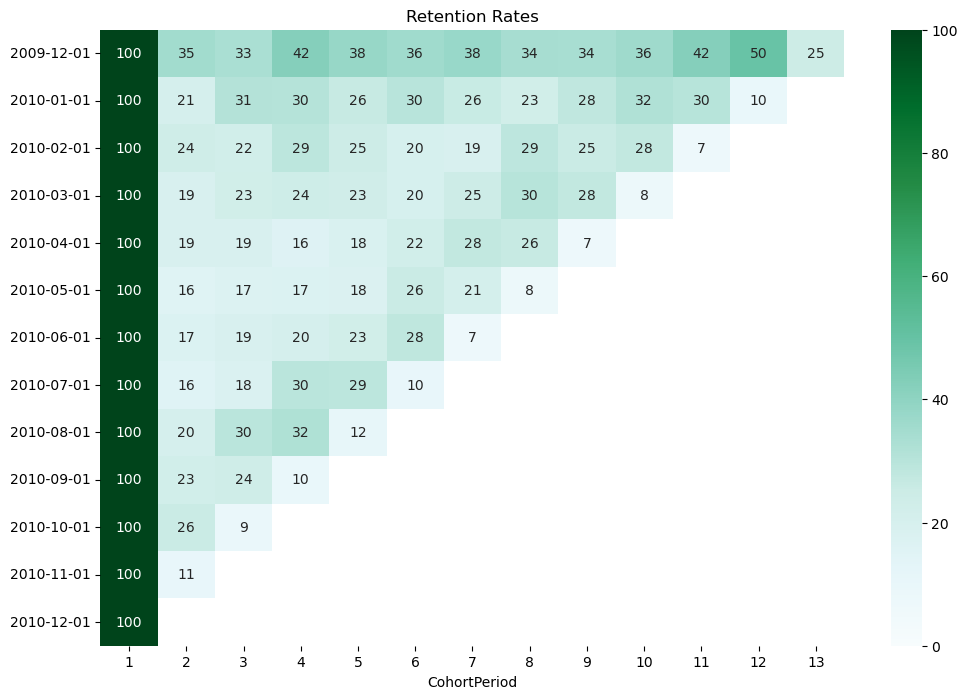

In [10]:
fig, ax = plt.subplots(figsize=(12,8))

# create a heat map using seaborn
ax = sns.heatmap(retention
                ,annot=True
                ,fmt='.0f'
                ,vmin=0
                ,vmax=100
                 ,cmap='BuGn'
                # ,cmap='crest'
                # ,annot_kws={'color': 'black', 'visible': True}
                )

ax.set_title('Retention Rates')
plt.show()